# Scikit-learn 
Scikit-learn (imported as sklearn) is a powerful Python library for machine learning and data analysis. It provides clean, consistent tools for building models, preprocessing data, evaluating performance, and more. It’s built on top of NumPy, Pandas, and Matplotlib, making it easy to integrate into data workflows.

### SimpleImputer()
SimpleImputer is a data preprocessing tool from Scikit-learn that helps you fill in missing values in a dataset. Missing values are often represented as np.nan, and they can cause problems when training machine learning models — so we need to handle them before analysis.

In [3]:
import numpy as np
import pandas as pd

names = ["Joe", np.nan, "Ken", "Jos", "Luke"]
exam_marks = [120, np.nan, 100, np.nan, 85]

df = pd.DataFrame({"names": names, "marks": exam_marks})
df


,names,marks
0,Joe,120.0
1,NaN,NaN
2,Ken,100.0
3,Jos,NaN
4,Luke,85.0


We have a dataset with some missing data in the "names" 
and "marks" columns. Now we are going to use the 
SimpleImputer() to fill the missing values. First, we will 
import SimpleImputer from the Sklearn library:

In [5]:
from sklearn.impute import SimpleImputer

# Fill missing numeric values with the mean
imputer_numeric = SimpleImputer(strategy='mean')
df[['marks']] = imputer_numeric.fit_transform(df[['marks']])

# Fill missing names with a constant value
imputer_non_numeric = SimpleImputer(strategy='constant', fill_value='Rob')
df[['names']] = imputer_non_numeric.fit_transform(df[['names']])
df


,names,marks
0,Joe,120.000000
1,Rob,101.666667
2,Ken,100.000000
3,Jos,101.666667
4,Luke,85.000000


### LabelEncoder()
The Sklearn LabelEncoder() is used to convert categorical data into 
numeric labels.  Most machine learning models operate 
on numerical data, so it's necessary to represent 
categorical variables (e.g., "male" or "female," "red" or 
"blue") in a numerical format.

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to the 'names' column
df['names'] = le.fit_transform(df['names'])
df


,names,marks
0,0,120.000000
1,4,101.666667
2,2,100.000000
3,1,101.666667
4,3,85.000000


Names column is now in numerical lables. LabelEncoder encodes categorical labels as 
integer values. The transformed data is a single column of 
integers.    

### OneHotEncoder()
OneHotEncoder is a preprocessing tool that converts categorical values into binary vectors. Unlike LabelEncoder, which assigns each category a single integer, OneHotEncoder creates multiple columns, one for each unique category.

Each row is represented with 1 in the column of its category and 0 in all others.

This avoids implying any numeric order between categories (which LabelEncoder might suggest).

In [7]:
import numpy as np
import pandas as pd

names = ["Joe", "Rob", "Ken", "Jos", "Luke"]
exam_marks = [120, 101, 100, 101, 85]

df = pd.DataFrame({"names": names, "marks": exam_marks})
df


,names,marks
0,Joe,120
1,Rob,101
2,Ken,100
3,Jos,101
4,Luke,85


To transform the "names" column using OneHotEncoder in Scikit-learn:

- Import and initialize the encoder.

- Set sparse_output=False so the result is a dense NumPy array instead of a sparse matrix.

- Apply fit_transform() on the "names" column to generate binary vectors, where each unique name is represented by its own column with 1 indicating presence and 0 indicating absence.

In [8]:
from sklearn.preprocessing import OneHotEncoder

# Initializing encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(df[['names']])

# Converting into DataFrame for better readability
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.categories_[0])
encoded_df


,Joe,Jos,Ken,Luke,Rob
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


### StandardScaler()  
Machine learning models can be biased toward features with larger numerical ranges, like salary compared to age. StandardScaler() solves this by standardizing each feature so that it has a mean of 0 and a standard deviation of 1. This ensures all features contribute fairly to the model, improving training stability and convergence without one variable dominating due to scale differences.



In [9]:
age = [23, 45, 35, 68, 55]
salary = [50000, 80000, 45000, 55000, 65000]

df = pd.DataFrame({"Age": age, "Salary": salary})
df


,Age,Salary
0,23,50000
1,45,80000
2,35,45000
3,68,55000
4,55,65000


Here, we have a 'salary' column that has a much larger 
range of values (50,000 to 65,000) compared to the 'Age' 
column (23 to 68). This difference in scale can 
significantly impact the performance of machine learning 
algorithms. We are going to use the StandardScaler() to 
standardize the features to have a mean of 0 and a 
standard deviation of 1. First, we are going to import 
StandardScaler from sklearn.preprocessing: 

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the Scaler
scaler = StandardScaler()

# Standardize the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'Salary'])
scaled_df


,Age,Salary
0,-1.425422,-0.725241
1,-0.012842,1.692228
2,-0.654924,-1.128152
3,1.463947,-0.322329
4,0.629240,0.483494


 This process calculates the mean and 
standard deviation of each feature and standardizes the 
data accordingly. You can see in the output that when we 
convert the standardized data back into a DataFrame, we 
get an output of the two columns with scaled data. This is 
beneficial for machine learning algorithms that are 
sensitive to feature scales and is likely to improve model 
performance and convergence.

### train_test_split()  
To evaluate a model properly, we split data into training and testing sets using train_test_split(). The training set teaches the model patterns, while the testing set checks how well it generalizes to unseen data. By specifying parameters like test_size=0.2 and random_state=42, we can control the proportion of data used for testing and ensure reproducibility of results.



In [11]:
feature1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
feature2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
target = [1, 0, 0, 0, 1, 1, 0, 1, 0, 0]

df = pd.DataFrame({"feature1": feature1, "feature2": feature2, "target": target})
df


,feature1,feature2,target
0,1,10,1
1,2,20,0
2,3,30,0
3,4,40,0
4,5,50,1
5,6,60,1
6,7,70,0
7,8,80,1
8,9,90,0
9,10,100,0


We have a simple dataset with 'feature1', 'feature2', and 'target' columns, used for demonstration. In real-world scenarios, much larger datasets are needed for effective use of Scikit-learn functions. The goal is to train a model to predict 'target' using 'feature1' and 'feature2'. We'll split the data using train_test_split(), allocating 80% (8 rows) for training and 20% (2 rows) for testing to evaluate model performance.

In [12]:
from sklearn.model_selection import train_test_split

# Split data into X and y variables
X = df.drop(columns=['target'])
y = df["target"]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# View training and testing data:
X_train, X_test


(   feature1  feature2
 5         6        60
 0         1        10
 7         8        80
 2         3        30
 9        10       100
 4         5        50
 3         4        40
 6         7        70,
    feature1  feature2
 8         9        90
 1         2        20)

We import train_test_split from Scikit-learn to divide the dataset into features (X) and target (y). X includes 'feature1' and 'feature2', while y is the 'target' column. Using train_test_split(X, y, test_size=0.2, random_state=42), we randomly split the data into 80% training and 20% testing sets, ensuring reproducibility.

### Classification with Sklearn  
Classification predicts categorical outcomes, such as 0 or 1. With Scikit-learn’s DecisionTreeClassifier, we train the model using the training set (X_train, y_train) and then test it on unseen data (X_test). The fit() method teaches the model relationships between features and labels, while score() evaluates accuracy, showing how well predictions match actual outcomes.



In [13]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

We create a DecisionTreeClassifier instance with random_state=42 for reproducibility and train it using fit(X_train, y_train). After training, we evaluate the model’s accuracy on unseen data using score(X_test, y_test), which compares predictions to actual labels from the 20% test set.

### accuracy_score()  
Accuracy measures the proportion of correct predictions out of all predictions made. In Scikit-learn, this can be computed directly with a model’s score() method or more flexibly with accuracy_score(), which allows you to first generate predictions and then compare them to true labels. It’s a simple but broad metric for model performance.



In [14]:
# Checking accuracy on test set
accuracy = clf.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy:.2f}")


Accuracy on test set: 0.00


The score() method measures model accuracy—how many predictions match actual labels. A score of 1.0 means perfect predictions; 0.0 means all were wrong. In this case, the model scored 0.0, likely due to limited data, weak feature-target relationships, or an unsuitable model. Low accuracy often signals the need for better data or model adjustments.

### precision_score()  
Precision focuses on the quality of positive predictions. It answers: “Of all the cases the model predicted as positive, how many were truly positive?” 4

The formula is 
Precision = True Positives/(True Positives + False Positives)   

. This metric is especially important when false positives are costly, such as in medical diagnoses or fraud detection.



In [17]:
from sklearn.metrics import precision_score

# Calculating precision score
precision = precision_score(y_test, y_pred, average='binary', zero_division=0.0)
print(f"Precision: {precision:.2f}")


Precision: 0.00


Here, we get a precision score of 0.0 because the model 
did not make any true positive predictions. This means 
the model didn’t correctly identify any of the positive class 
labels (1). In other words, whenever the model predicted a 
'positive' (1), it was wrong. This is expected in this case, as 
the model didn’t learn the patterns well and made 
incorrect predictions for all instances, resulting in no true 
positives.

### recall_score()  
Recall measures how well the model identifies all actual positives. It answers: “Of all the true positive cases, how many did the model correctly predict?” The formula is 
recall = True Positives/(True Positives + False Negatives)  
. High recall is critical in contexts where missing a positive case is dangerous, like failing to detect a disease.



In [18]:
from sklearn.metrics import precision_score

# Calculating precision score
precision = precision_score(y_test, y_pred, average='binary', zero_division=0.0)
print(f"Precision: {precision:.2f}")


Precision: 0.00


Since our model made no true positive predictions, it's 
expected that the recall score is 0.0. In fact, all the 
predictions by the model are positive (1), which is 
incorrect because there are no True Positives in the result 
set. We can confirm this by examining the output of 
y_pred, which contains the model's predictions on the 
test data.

In [19]:
y_pred

array([1, 1])

You can see here that the model is predicting only ones 
(1), while the actual labels in y_test are all zeros (see 
below). This mismatch explains why both the recall score 
and precision score are 0.0. Our model has incorrectly 
predicted all test samples as positive.

In [20]:
y_test

8    0
1    0
Name: target, dtype: int64

### f1_score()  
The F1 score balances precision and recall by taking their harmonic mean. It is useful when you need a single metric that accounts for both false positives and false negatives. 

The formula is 
F1-score = 2 * (precision * recall) / (precision + recall) 

 A high F1 score indicates the model performs well in both identifying positives and avoiding false alarms.

In [21]:
from sklearn.metrics import f1_score

# F1-Score evaluation
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
print(f"F1-Score: {f1:.2f}")

# Output: F1-Score: 0.00

F1-Score: 0.00


### Confusion Matrix 
The confusion_matrix() function summarizes model performance by showing True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

Implementation & Interpretation
In this specific case, the matrix shows the model predicted the positive class (1) for both test samples, but both were incorrect (resulting in 2 False Positives).


In [22]:
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Output: 
# [[0 2]
#  [0 0]]

[[0 2]
 [0 0]]


The confusion matrix above shows that there are 2 False 
Positive predictions. This confirms that the model 
predicted the positive class (1) for both test samples, but 
those predictions were incorrect. There are no True 
Positives, True Negatives, or False Negatives in this case, 
as the model consistently predicted the positive class. The 
best way to view the output of the confusion matrix is via 
a confusion matrix plot. Let’s create one using the 
Seaborn heatmap: 

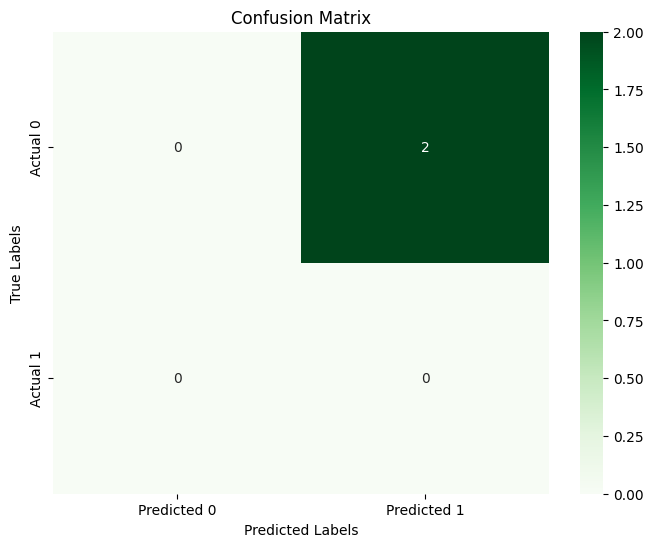

In [30]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=True,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

We can now clearly see the two False Positives predictions 
made by the model. 

###  Regression with Sklearn 

Regression is used to predict continuous numerical values from input data. For example, we might estimate a person’s weight using their height and age, or predict house prices based on features like size, number of rooms, and location. The process is similar to classification, but instead of predicting categories, regression outputs numbers.

Scikit‑learn offers several regression algorithms, including Linear Regression, Ridge Regression, Lasso Regression, and Decision Tree Regressor. To get started, we can use LinearRegression, one of the simplest and most widely used models, to demonstrate how regression works in practice.

We start with a simple dataset containing Experience and Age as features to predict Salary.

In [28]:

# Load simple dataset
data = {
    'Experience': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [25, 35, 35, 40, 42, 45, 50, 55, 60, 63],
    'Salary': [45000, 50000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000]
}
df = pd.DataFrame(data)
df

,Experience,Age,Salary
0,1,25,45000
1,2,35,50000
2,3,35,60000
3,4,40,65000
4,5,42,70000
5,6,45,75000
6,7,50,80000
7,8,55,85000
8,9,60,90000
9,10,63,95000


**Data Splitting and Scaling**   
Scaling ensures all features contribute equally to the model.

Split: Divide data into 80% training and 20% testing sets.

StandardScaler: Standardize features by removing the mean and scaling to unit variance.

In [ ]:

# Separate features (X) and target (y)
X = df[['Experience', 'Age']]
y = df['Salary']

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Training

In [32]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Mean Squared Error (MSE)    
MSE calculates the average of the squared differences between predicted and actual values. A lower number indicates better performance.

In [34]:
from sklearn.metrics import mean_squared_error

# Evaluate using MSE
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 20529957.75375235


### Root Mean Squared Error (RMSE)  
MSE gives error in squared units (like squared dollars), which is hard to interpret. RMSE solves this by measuring prediction error in the original scale. It works by:

Finding the difference between predicted and actual values.

Squaring those differences (to keep them positive and highlight large errors).

Averaging the squared differences.

Taking the square root to return to the original units.

In [36]:
from sklearn.metrics import root_mean_squared_error

# Evaluate using RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 4530.999641773585


The model’s predictions are off by about $4530 on average. For example, if the actual salary is $50,000, the model might predict $54,530 or $45,469. While this error is high, RMSE is useful because it’s expressed in the same units as the target (salary). In practice, you’d improve accuracy by adding features, tuning the model, or trying different algorithms. Here, the goal is simply to demonstrate how Scikit‑learn metrics evaluate model performance, not to perfect the output.

### R2_score 
$R^2$ measures how much of the variation in the target variable is explained by the features.Perfect Score (1.0): Predictions perfectly match actual values.Zero Score: The model performs no better than predicting the average target value.Negative Value: The model performs worse than simply guessing the average.

In [37]:
from sklearn.metrics import r2_score

# Evaluate using R2
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9486751056156191


The output of 94% shows that model is doing a really good 
job of predicting the target (salary) based on the features 
(experience and age).